<a href="https://colab.research.google.com/github/JavierHerreraPadilla/powerbi_sierracol/blob/main/pandas_series_y_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Series





In [ ]:
import numpy as np
from numpy.random import randint, randn
import pandas as pd

In [ ]:
letras = ["a", "b", "c"]
mi_data = [1,2,3]
arr = np.array(mi_data)
d = {"a": 10, "b": 20, "c":30}

las series tienen muchos argumentos: mas importantes data e index

In [ ]:
pd.Series(data=mi_data)

0    1
1    2
2    3
dtype: int64

In [ ]:
#Se puede especificar el índice con el argumento index
pd.Series(data=mi_data, index=letras)

a    1
b    2
c    3
dtype: int64

In [ ]:
# con el array
pd.Series(mi_data, letras)

a    1
b    2
c    3
dtype: int64

In [ ]:
#Con el diccionario
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [ ]:
# Una serie puede contener cualquier tipo de dato
pd.Series(letras)

0    a
1    b
2    c
dtype: object

In [ ]:
#usar los ínidice para usar y buscar información
ser1 = pd.Series([1,2,3,4], ["usa", "germany", "russ", "japan"])

In [ ]:
ser1

usa        1
germany    2
russ       3
japan      4
dtype: int64

In [ ]:
ser2 = pd.Series([1,2,5,4], ["usa", "germany", "italy", "japan"])
ser2

usa        1
germany    2
italy      5
japan      4
dtype: int64

In [ ]:
#seleccionar datos
ser1["usa"]

1

In [ ]:
ser3 = pd.Series(data=letras)
ser3[0]

'a'

In [ ]:
# las operaciones básicas en las series se realizan con los indices
ser1 + ser2

germany    4.0
italy      NaN
japan      8.0
russ       NaN
usa        2.0
dtype: float64

DATAFRAMES


In [ ]:
np.random.seed(101)

In [ ]:
df = pd.DataFrame(randn(5,4), ["a", "b", "c", "d", "e"], ["x", "y", "w", "z"])
df
# un dataframe es un conjunto de series

,x,y,w,z
a,2.706850,0.628133,0.907969,0.503826
b,0.651118,-0.319318,-0.848077,0.605965
c,-2.018168,0.740122,0.528813,-0.589001
d,0.188695,-0.758872,-0.933237,0.955057
e,0.190794,1.978757,2.605967,0.683509


In [ ]:
# Seleccionar columnas
df["x"]

a    2.706850
b    0.651118
c   -2.018168
d    0.188695
e    0.190794
Name: x, dtype: float64

In [ ]:
type(df["x"])

pandas.core.series.Series

In [ ]:
#también se puede seleccionar columna con la notación de punto - no usar se puede confundir con funciones
df.x

a    2.706850
b    0.651118
c   -2.018168
d    0.188695
e    0.190794
Name: x, dtype: float64

In [ ]:
#multiples columnas
df[["x", "z"]]

,x,z
a,2.706850,0.503826
b,0.651118,0.605965
c,-2.018168,-0.589001
d,0.188695,0.955057
e,0.190794,0.683509


In [ ]:
#crear una nueva columna
df["new"]

KeyError: ignored

In [ ]:
df["new"] = df["x"] + df.y

In [ ]:
df

,x,y,w,z,new
a,2.706850,0.628133,0.907969,0.503826,3.334983
b,0.651118,-0.319318,-0.848077,0.605965,0.331800
c,-2.018168,0.740122,0.528813,-0.589001,-1.278046
d,0.188695,-0.758872,-0.933237,0.955057,-0.570177
e,0.190794,1.978757,2.605967,0.683509,2.169552


In [ ]:
#eliminar columna - explicar el error
df.drop("new")

In [ ]:
#hay que especificar el axis = 1 - columna. al borrar la columna no se guarda en el dataframe. inplace=True
df.drop("new", axis=1)

In [ ]:
df

In [ ]:
# df.drop("new", axis=1, inplace=True)
df

In [ ]:
#eliminar filas
df.drop("e")

In [ ]:
#
df.shape

In [ ]:
#seleccionar filas
df

In [ ]:
#hay dos formas de seleccionar filas - devuelve una serie
df.loc["c"]

In [ ]:
# basada en el número del índice
df.iloc[2]

In [ ]:
df.iloc[1:6]

In [ ]:
# seleccionar una celda
df.loc["b","z"]

In [ ]:
# sub conjunto del df
df.loc[["a", "b"], ["w", "y"]]

In [ ]:
# selección condicional - importante
df > 0

In [ ]:
cond_df = df > 0
cond_df

In [ ]:
df[cond_df]

In [ ]:
df[df > 0]

In [ ]:
df["w"] > 0

In [ ]:
# para qué no salgan los nan
df[df["w"] > 0]

In [ ]:
df[df["z"] < 0]

In [ ]:
# tener en cuenta que estas operaciones devuelven un dataframe y se puede montar comandos sobre comandos
df[df["w"] > 0]["x"]
#hacer el ejemplo

In [ ]:
# condicionales múltiples
df[df["w"]<0 and df["y"]>0]

In [ ]:
# Y
df[(df["w"]>0) & (df["y"]>1)]

In [ ]:
# O
df[(df["w"]>0) | (df["y"]>1)]

In [ ]:
 # ÍNDICES - no ocurre inplace
 df.reset_index()

In [ ]:
# configurar index

In [ ]:
new_ind = "BOG BOL CAS MET AM".split()

In [ ]:
df["departamento"] = new_ind
df

In [ ]:
df.set_index("departamento")

In [ ]:
# multi indices y jerarquias

In [ ]:
outside = "G1 G1 G1 G2 G2 G2".split()
inside = [1,2,3,1,2,3]
hier_ind = list(zip(outside, inside))
hier_ind = pd.MultiIndex.from_tuples(hier_ind)

In [ ]:
df = pd.DataFrame(randn(6,2), hier_ind, ["A", "B"])

In [ ]:
df

In [ ]:
df.loc["G1"]

In [ ]:
df.loc["G1"].loc[1]

In [ ]:
df.index.names

In [ ]:
df.index.names = ["Grupos", "Num"]
df

In [ ]:
df.loc["G2"].loc[2]["B"]

In [ ]:
# cross section
df

In [ ]:
df.xs("G1")

In [ ]:
df.xs(1, level="Num")

In [ ]:
# datos faltantes
# pandas rellena los valores faltantes con nan

In [ ]:
d = {"a":[1,2,np.nan], "b":[5,np.nan,np.nan],"c":[1,2,3]}

In [ ]:
df = pd.DataFrame(d)
df

In [ ]:
df.isna()

In [ ]:

df.isna().values.any()

In [ ]:
df["a"].isna().sum()

In [ ]:
# elimanr filas con nan
df.dropna()

In [ ]:
# elimanr columnas con nan
df.dropna(axis=1)

In [ ]:
#thresh - define un minimo de na en la columna o en la fila
df.dropna(thresh=2)

In [ ]:
# rellenar valores vacion
df.fillna(value="RELLENO")

In [ ]:
df["a"].fillna(value=df["a"].mean())

In [ ]:
#GROUP BY

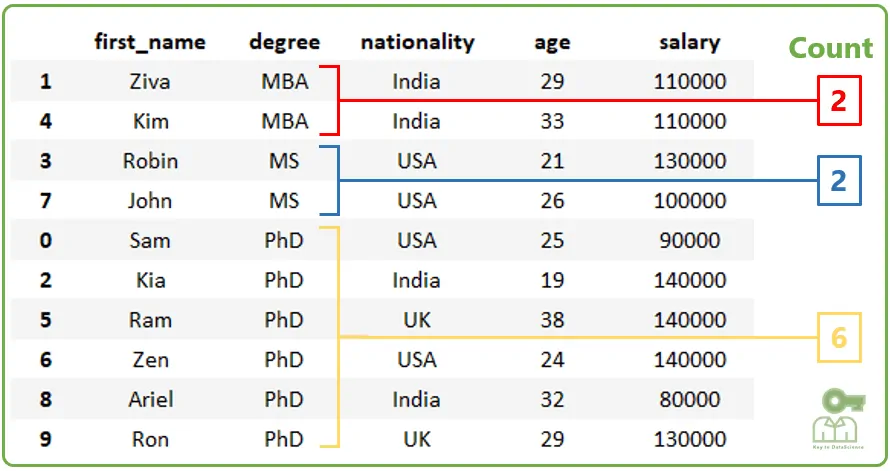

In [ ]:
data = {"company": ["goog" , "goog", "msft", "msft", "fb", "fb"],
        "person":["sam", "charlie", " amy", "vanessa", "carl", "sarah"],
        "sales":[200, 120, 340, 124, 243, 350]}

In [ ]:
df = pd.DataFrame(data)
df

In [ ]:
df.groupby("company")

In [ ]:
comp = df.groupby("company")

In [ ]:
comp.mean()

In [ ]:
comp.sum()

In [ ]:
comp.std()

In [ ]:
comp.sum().loc["fb"]

In [ ]:
# cuenta entrada por grupos
comp.count()

In [ ]:
comp.max()

In [ ]:
comp.describe()

In [ ]:
comp.describe().transpose()

In [ ]:
#merging and concatenation

In [ ]:
joined_df = employees.join(departments.set_index('Department'), on='Department')
joined_df

In [ ]:
data1 = {
    'A': [1, 2, 3],
    'B': ['foo', 'bar', 'baz'],
}

df1 = pd.DataFrame(data1)

data2 = {
    'A': [4, 5, 6],
    'B': ['apple', 'orange', 'banana'],
}

df2 = pd.DataFrame(data2)

In [ ]:
concatenated_df = pd.concat([df1, df2], ignore_index=True)
print(concatenated_df)

In [ ]:
data1 = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Alice', 'Mike', 'Emily', 'David'],
    'Department': ['HR', 'Engineering', 'Marketing', 'HR', 'Sales'],
}

employees = pd.DataFrame(data1)

data2 = {
    'EmployeeID': [1, 2, 3, 4, 6],
    'Salary': [50000, 60000, 55000, 52000, 48000],
}

salaries = pd.DataFrame(data2)

In [ ]:
merged_df = pd.merge(employees, salaries, on='EmployeeID', how='inner')
print(merged_df)

In [ ]:
# OTRAS OPERACIONES

In [ ]:
df = pd.DataFrame({"col1": [1,2,3,4],
                   "col2": [444,555,666,444],
                   "col3":["abc", "def", "ghi", "xyz"]})

In [ ]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [ ]:
# valores unicos
df["col2"].unique()

array([444, 555, 666])

In [ ]:
# numero de valores únicos
df["col2"].nunique()

3

In [ ]:
# contar valores únicos
df["col2"].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

In [ ]:
# ordenar
df.sort_values(by=["col2", "col1"])

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


In [ ]:
# vacios
df.isna().values.any()

False

#ENTRADA Y SALIDA DE INFORMACIÓN


*   CSV
*   EXCEL
*   SQL
*   ETC


In [ ]:
df = pd.read_csv('Salaries.csv')

In [ ]:
df.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [ ]:
other_df = (df.loc[:3, ["JobTitle", "BasePay"]])

In [ ]:
other_df.to_csv("salida", index=False)

In [ ]:
# IMPORTAR DATOS DE EXCEL
# Hay que especificar la hoja -  cada hoja es un DF

In [ ]:
pd.read_excel("excel.xlsx", sheet_name="nombre_hoja")